In [ ]:
!pip install tensorflow-gpu==2.0.0
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

     |████████████████████████████████| 380.8 MB 41 kB/s 
     |████████████████████████████████| 449 kB 46.6 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 3.8 MB 37.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=83a994d4c21b009c11fc6fe2f58257ee82b2699f35b52012d3aff0f0f0397150
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
pd.set_option("display.precision", 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root='/content/drive/MyDrive/datasets'

In [ ]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/content/drive/MyDrive/datasets
Found 897 images belonging to 7 classes.
Found 3597 images belonging to 7 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
with open('labels.txt','w') as f:
  f.write(str(dataset_labels))

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 7)
['10 Rupees-Samples' '100 Rupees-Samples' '20 Rupees-Samples'
 '200 Rupees-Samples' '2000 Rupees-Samples' '50 Rupees-Samples'
 '500 Rupees-Samples']


In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Train for 113.0 steps, validate for 29.0 steps
Epoch 1/10
113/113 [==============================] - 241s 2s/step - loss: 0.8602 - acc: 0.7153 - val_loss: 0.3844 - val_acc: 0.9387
Epoch 2/10
113/113 [==============================] - 27s 237ms/step - loss: 0.2104 - acc: 0.9497 - val_loss: 0.2195 - val_acc: 0.9677
Epoch 3/10
113/113 [==============================] - 26s 234ms/step - loss: 0.1213 - acc: 0.9791 - val_loss: 0.1722 - val_acc: 0.9643
Epoch 4/10
113/113 [==============================] - 27s 237ms/step - loss: 0.0793 - acc: 0.9855 - val_loss: 0.1203 - val_acc: 0.9911
Epoch 5/10
113/113 [==============================] - 27s 239ms/step - loss: 0.0572 - acc: 0.9933 - val_loss: 0.1008 - val_acc: 0.9933
Epoch 6/10
113/113 [==============================] - 26s 232ms/step - loss: 0.0462 - acc: 0.9956 - val_loss: 0.0875 - val_acc: 0.9911
Epoch 7/10
113/113 [==============================] - 26s 233ms/step - loss: 0.0398 - acc: 0.9956 - val_loss: 0.0806 - val_acc: 0.9944
Epoch 8/10

In [ ]:
SAVED_MODEL = "saved_models/shoe1"
tf.keras.experimental.export_saved_model(model, SAVED_MODEL)
model = tf.keras.experimental.load_from_saved_model(SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'list' object has no attribute 'name'


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: saved_models/shoe1/saved_model.pb


INFO:tensorflow:SavedModel written to: saved_models/shoe1/saved_model.pb


Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.


Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.


In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [ ]:
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,10 Rupees-Samples,100 Rupees-Samples,20 Rupees-Samples,200 Rupees-Samples,2000 Rupees-Samples,50 Rupees-Samples,500 Rupees-Samples
0,0.00000027,0.00001633,0.99933761,0.00000166,0.00064096,0.00000006,0.00000313
1,0.00124228,0.00037488,0.00001430,0.00004992,0.00057852,0.99765587,0.00008415
2,0.00153608,0.03632659,0.00000682,0.00030306,0.00346309,0.00073936,0.95762497
3,0.00028774,0.00019493,0.99581283,0.00008502,0.00360466,0.00000098,0.00001387
4,0.99503005,0.00181241,0.00012818,0.00092781,0.00207625,0.00000653,0.00001866


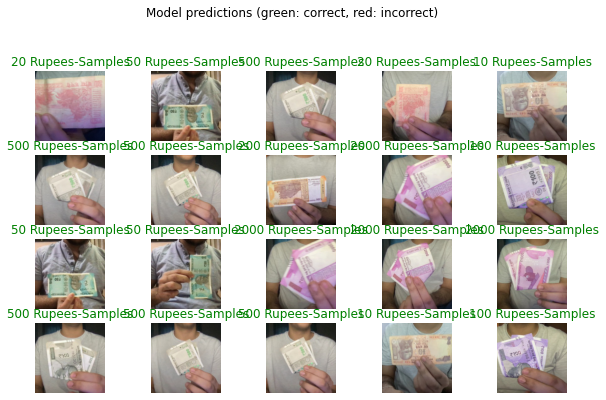

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.2)
for n in range(20):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
 _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [ ]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/shoe.tflite"
TFLITE_QUANT_MODEL = "tflite_models/shoe_quant.tflite"

mkdir: cannot create directory ‘tflite_models’: File exists


In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : model(x))
# Save the concrete function.
concrete_func = run_model.get_concrete_function(
tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)
print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 11M
-rw-r--r-- 1 root root 2.3M Jan  8 14:24 shoe_quant.tflite
-rw-r--r-- 1 root root 8.5M Jan  8 14:24 shoe.tflite


In [ ]:
from google.colab import files

files.download('tflite_models/model_unquant.tflite')
files.download('tflite_models/model_unquant.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>